In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Pre_Cleaned Data 

In [2]:
df = pd.read_csv('Data/food sales.csv')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


# Initial Exploration

What is my dataset like?

In [7]:
print(f'We have {len(df)} rows and {len(df.columns)} columns', '\n', sep='\n')

df.info()

We have 8523 rows and 9 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [9]:
print('The data statistic information is shown below:', '\n')
df.describe(include = 'all').round(3)

The data statistic information is shown below: 



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000,8523,8523.000,8523,8523.000,8523,8523,8523,8523.000
unique,NaN,2,NaN,16,NaN,3,3,4,NaN
top,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,NaN,5517,NaN,1232,NaN,5203,3350,5577,NaN
mean,12.858,NaN,0.066,NaN,140.993,NaN,NaN,NaN,2181.289
std,4.226,NaN,0.052,NaN,62.275,NaN,NaN,NaN,1706.500
min,4.555,NaN,0.000,NaN,31.290,NaN,NaN,NaN,33.290
25%,9.310,NaN,0.027,NaN,93.826,NaN,NaN,NaN,834.247
50%,12.858,NaN,0.054,NaN,143.013,NaN,NaN,NaN,1794.331
75%,16.000,NaN,0.095,NaN,185.644,NaN,NaN,NaN,3101.296


 ## Data Types: 

### Numerical data: 

#### continuous - 

Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

### Categorical data:

#### ordinal - 

Outlet_Size

#### nominal - 
Item_Fat_Contentj, Item_Type, Outlet_Type, Outlet_Location_Type


# Visualizations for EDA

Univariate Visuals: Explore the distribution of each column of data

Histograms

boxplots

Bar charts

Multivariate Visuals: Explore relationships between variables and differences in groups

Scatterplots

Correlation Heatmaps

Multivariate bar charts or boxplots



## Univariate Visuals

Explore the distribution of each column of data!

### Bar Charts: Plotting Categorical Frequencies

In [61]:
# Create a function to plot all the categorical columns' bar charts.
def bar_charts(data, x, y, figsize=(10,5), despine=True):
    counts = df[x].value_counts().sort_values()
    
    fig, ax = plt.subplots(figsize=figsize)
    
    palette = sns.color_palette("Paired")
    
    
    sns.barplot(data=df, x=counts.index, y=counts.values, ax=ax, palette=palette)
    ax.set_title(f'Types of {y}',
                fontsize='x-large',y=1.1,
                fontweight='semibold');
    
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90,ha='right')
       
        
    
    
    for bar in ax.patches:
         ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), 
                 ha='center', va='center', 
                   size=10, fontfamily='serif',
              xytext=(0, 8), 
                   textcoords='offset points')
    ax.set_ylim(top=ax.get_ylim()[-1]+5)
   
    
    if despine:
       
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
    

    plt.tight_layout()  
    
    return fig,ax
    
    

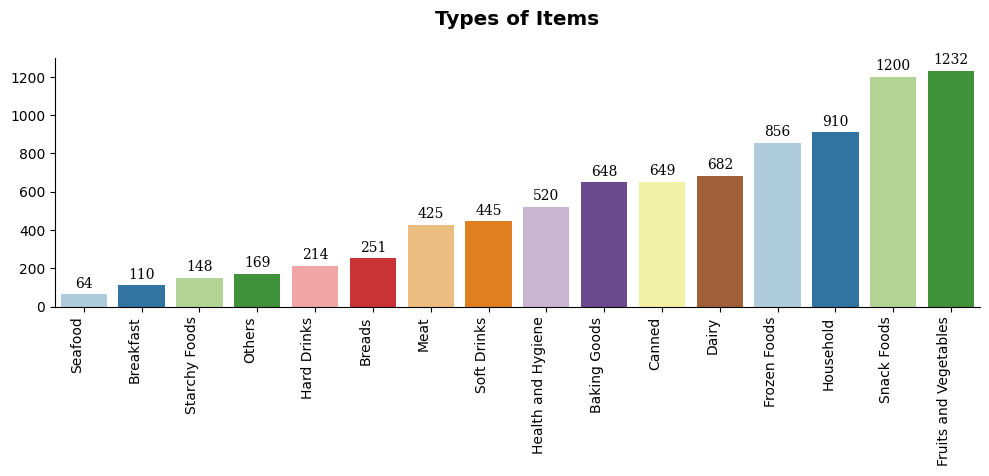

In [62]:
Item_type_fig,ax = bar_charts(df, 'Item_Type', 'Items')

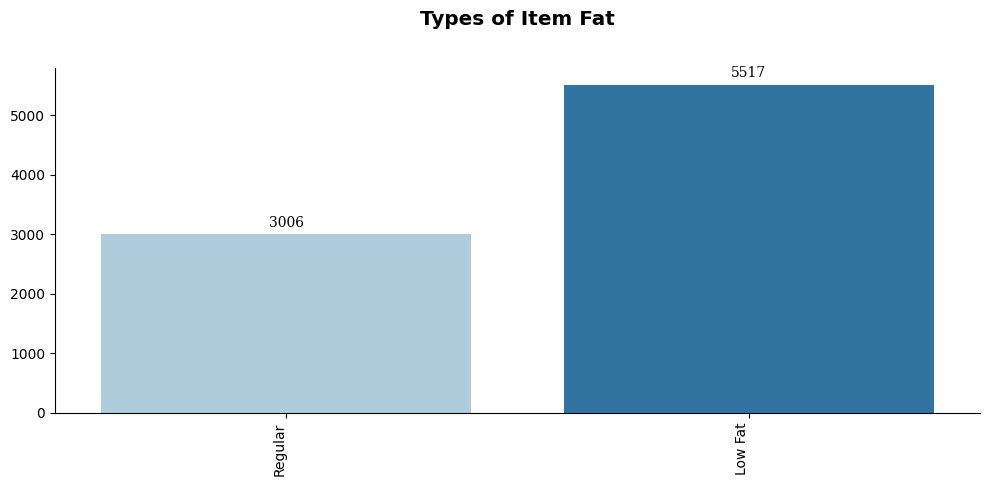

In [63]:
fat_type_fig,ax = bar_charts(df, 'Item_Fat_Content', 'Item Fat')


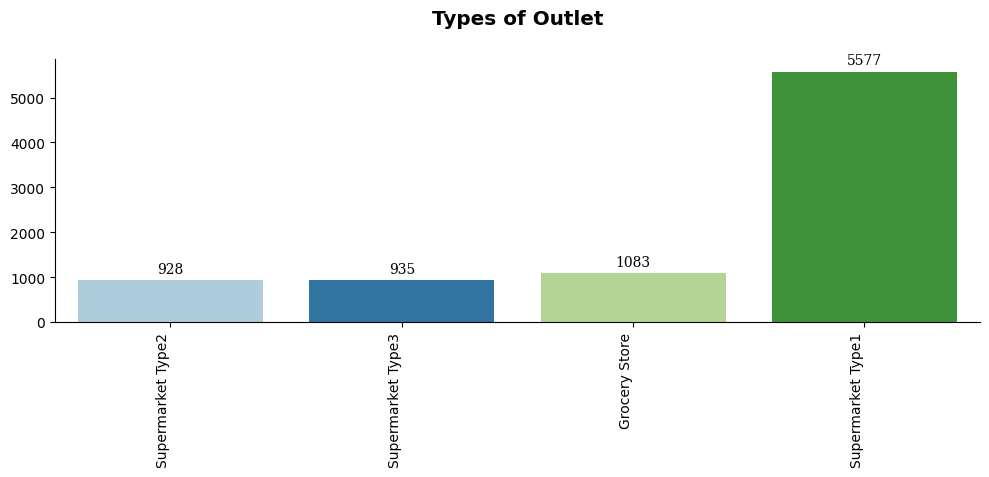

In [64]:
Outlet_Type_fig,ax = bar_charts(df, 'Outlet_Type', 'Outlet')

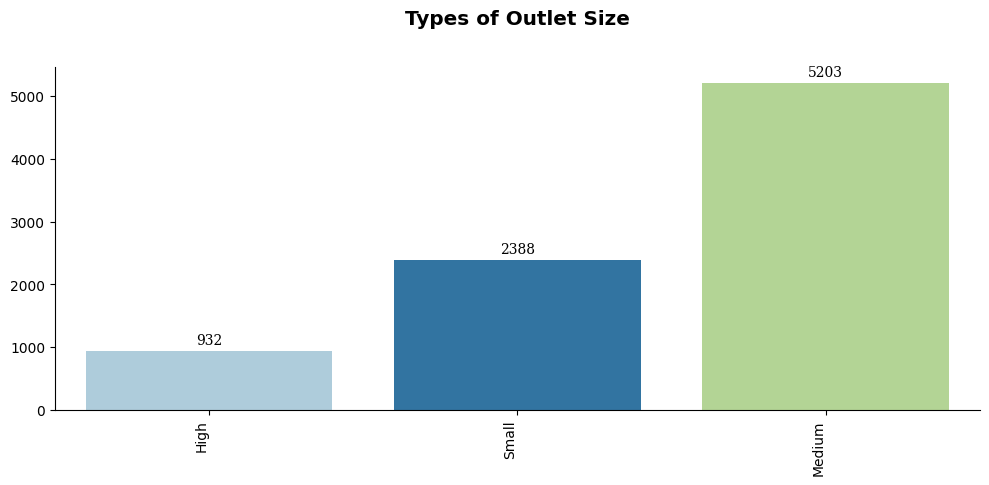

In [65]:
Outlet_size_fig,ax = bar_charts(df, 'Outlet_Size', 'Outlet Size')

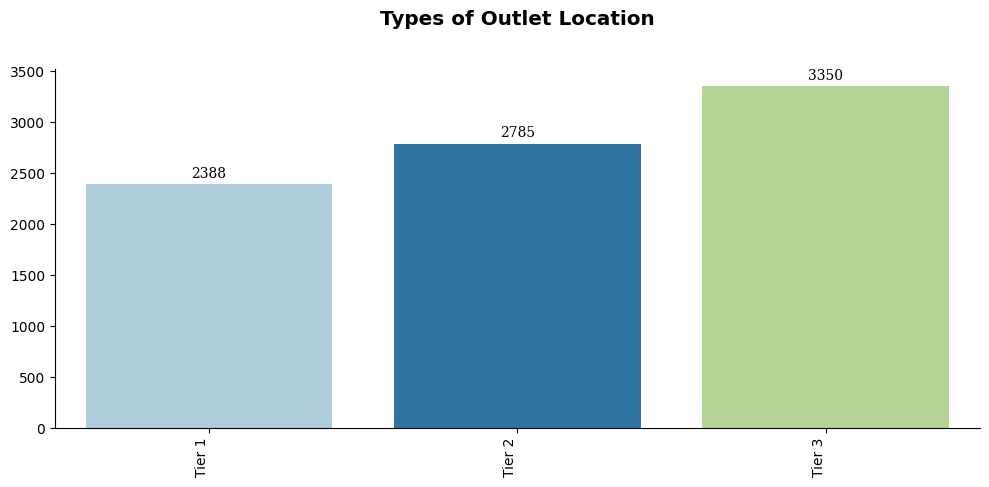

In [66]:
Outlet_Location_Type_fig,ax = bar_charts(df, 'Outlet_Location_Type', 'Outlet Location')

### Histograms: Plotting Continuous Distributions

In [80]:
# create a function to plot all the numerical columns histograms and boxplots.

def hist_box_plot(data, x, y, despine=True, format_price=True):
    fig, axes = plt.subplots(ncols=2, figsize=(10,5),
                         gridspec_kw={'width_ratios':[0.7,0.3]})
    
    sns.histplot(data=df,x=x,kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {y}',
                 fontsize='x-large',y=1.1);
    
    mean = df[x].mean()
    axes[0].axvline(mean,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = ${mean:,.2f}");

    med = df[x].median()
    axes[0].axvline(med,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = ${med:,.2f}");
    
    axes[0].set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    axes[0].set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')
    axes[0].legend()
    
    if despine:
        
        axes[0].spines['right'].set_visible(False)
        axes[0].spines['top'].set_visible(False)
        


    
    sns.boxplot(data=df, x=x, ax=axes[1],
               notch = True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize='small',
                        ha='right')
    

    [a.grid(axis='x',ls=':',color='gray') for a in axes];
    
    
    fig.tight_layout()
    
    return fig, axes
    


C:\Users\qfu88\AppData\Local\Temp\ipykernel_21364\1699046038.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize='small',


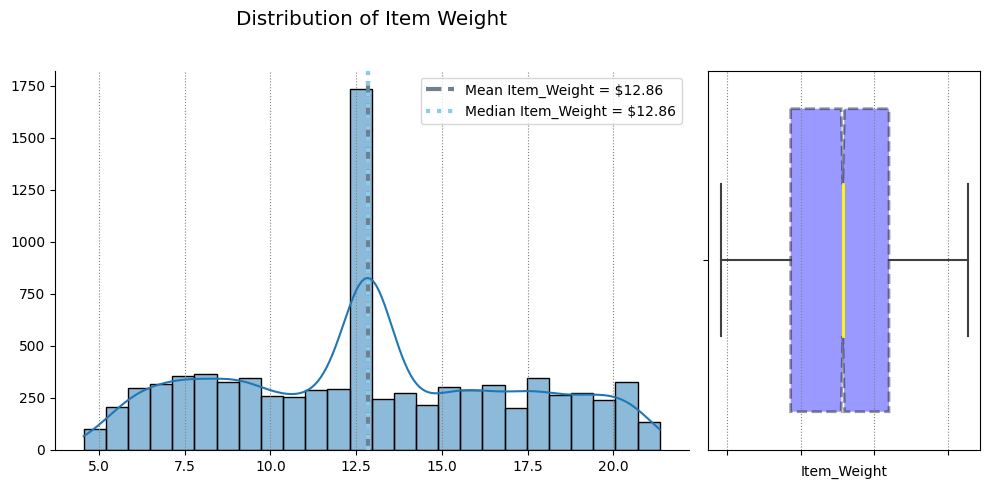

In [81]:
Item_weight_fig,axex = hist_box_plot(df, 'Item_Weight', 'Item Weight')

C:\Users\qfu88\AppData\Local\Temp\ipykernel_21364\2967197594.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize='small',


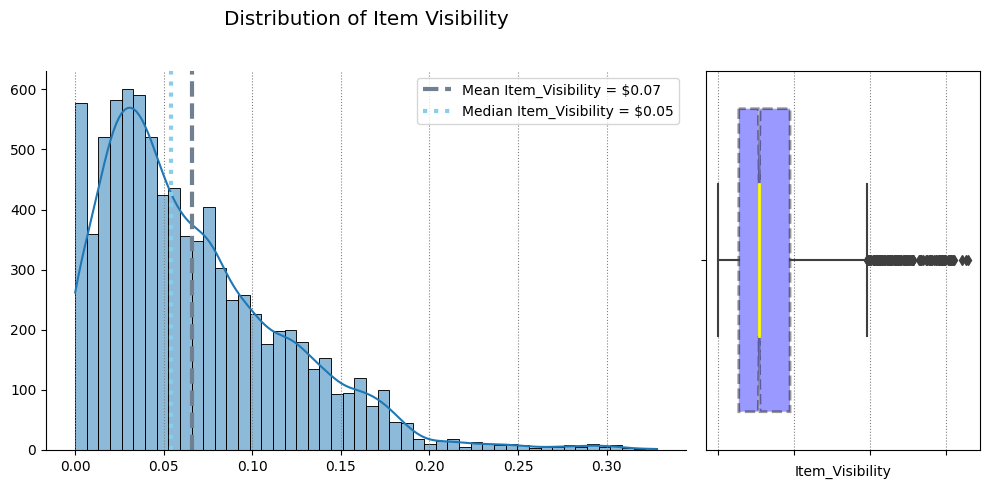

In [75]:
Item_visibility_fig,axex = hist_box_plot(df, 'Item_Visibility', 'Item Visibility')

C:\Users\qfu88\AppData\Local\Temp\ipykernel_21364\2967197594.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize='small',


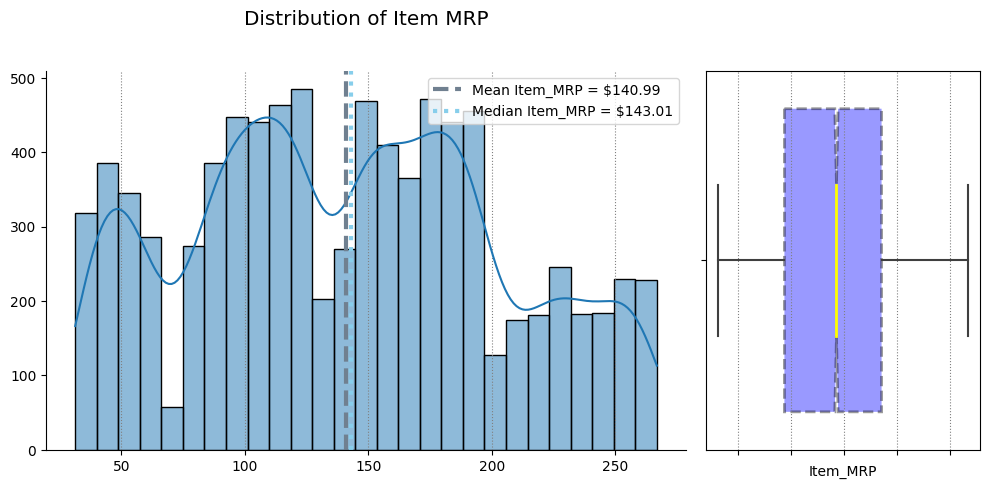

In [76]:
Item_MRP_fig,axex = hist_box_plot(df, 'Item_MRP', 'Item MRP')

### Target Feature: Item_Outlet_Sales

First, visual of the distribution of the sales

Next, visual of the outliers of the sales.

In [82]:
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):

    return f"${x*1e-3:,.0f}K"


In [93]:
plt.rcParams.update( {'font.family':'serif',
                    'figure.figsize':[15,20],
                    'font.size':'15', 
             'font.weight':'bold'})

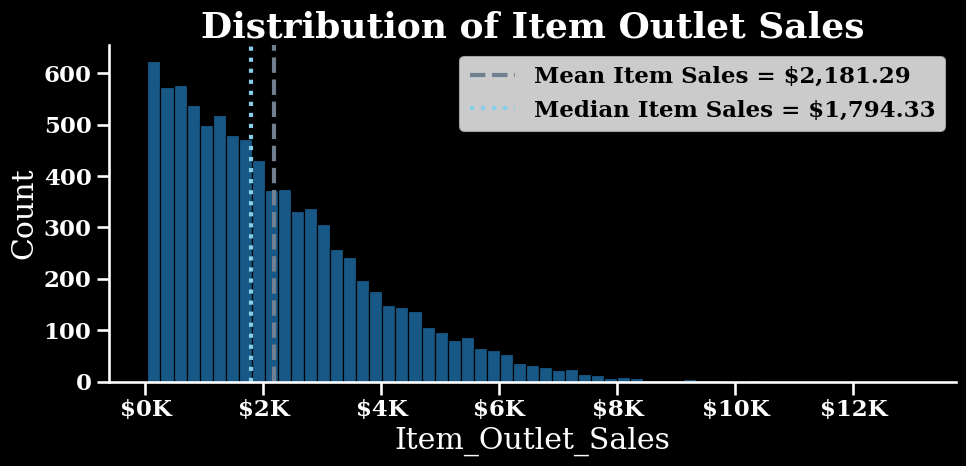

In [103]:
with plt.style.context(['dark_background','seaborn-muted']):
    fig, ax = plt.subplots(figsize=(10,5))
sns.set_context('talk')
sns.histplot(data=df,x='Item_Outlet_Sales', ax=ax)
ax.set_title('Distribution of Item Outlet Sales',
            fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold');
    
mean = df['Item_Outlet_Sales'].mean()
ax.axvline(mean,color='slategray', ls='--', lw=3,
            label=f"Mean {'Item Sales'} = ${mean:,.2f}");

med = df['Item_Outlet_Sales'].median()
ax.axvline(med,color='skyblue', ls=':', lw=3,
            label=f"Median {'Item Sales'} = ${med:,.2f}");
    
ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')
ax.legend()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

    
price_fmt_100k = FuncFormatter(hundred_k)
ax.xaxis.set_major_formatter(price_fmt_100k)
        
    
fig.tight_layout()
    


<AxesSubplot:xlabel='Item_Outlet_Sales'>

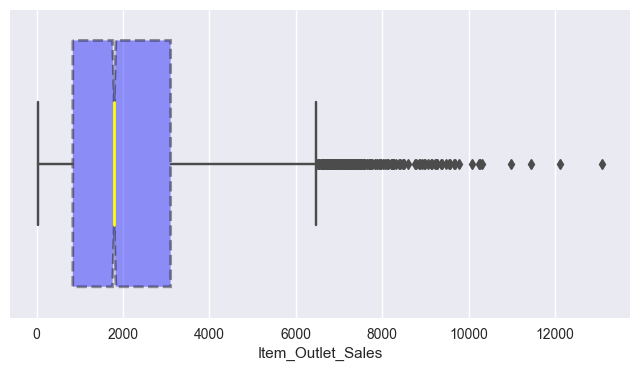

In [32]:
# plot 2: boxplot to show if there are any outliers in the sales.
fig, ax = plt.subplots(figsize = (8,4))

sns.boxplot(data = df, x='Item_Outlet_Sales',
                notch = True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))



In [34]:
# check the summary statistics of the sales.
df['Item_Outlet_Sales'].describe().round(1)

count     8523.0
mean      2181.3
std       1706.5
min         33.3
25%        834.2
50%       1794.3
75%       3101.3
max      13087.0
Name: Item_Outlet_Sales, dtype: float64

According to the results of our df.describe() above:

First Quartile (Q1) = 834.2

Third Quartile (Q3) = 3101.3

Interquartile Range (IQR) = Q3 - Q1 = 2267.1

1.5 * IQR = 3400.65

'Minimum' (before outliers) is Q1 - 2267.1 = -2566.45

'Maximum' (before outliers) is Q3 + 2267.1 = 5368.4

Notice below that the lower whisker is negative,the minmum value is 33.3. The plot does not cover non-existent values, and the upper whisker is at 5368.4

From the above plot, We can see a lot outliers above 5368.4

## Multivariate Visuals

Explore relationships between variables and differences in groups!

### Looking for Correlatioins

In [39]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


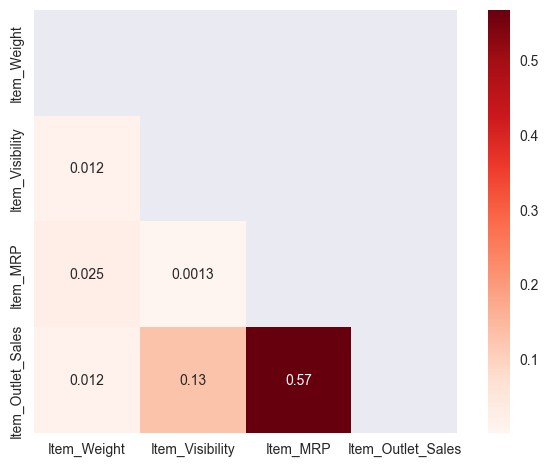

In [40]:
# visualiing correlation with a heatmap.
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

As we can see that, for our numerical features, there is only Item_MRP has a moderate correlation with sales.

### Correlation with Scatter plots

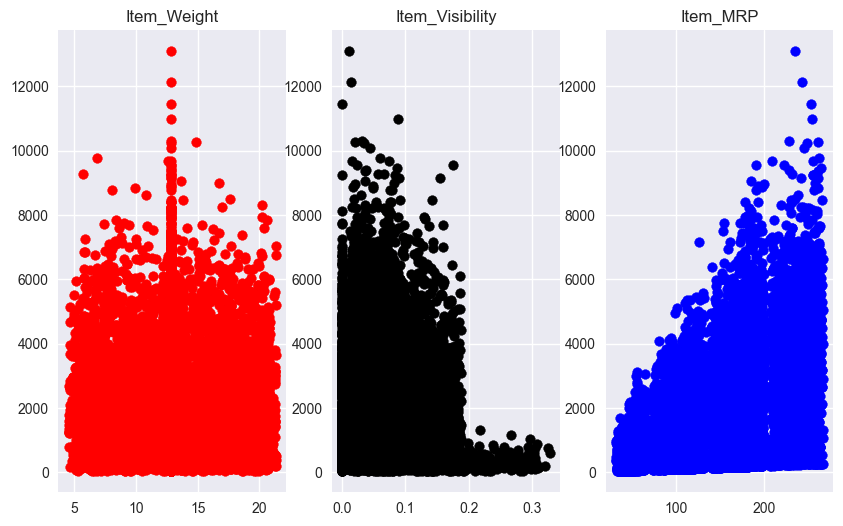

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(10,6));
# Subplot 1 
axes[0].scatter(df['Item_Weight'], df['Item_Outlet_Sales'], c= 'r');
axes[0].set_title('Item_Weight', fontsize = 12);

# Subplot 2
axes[1].scatter(df['Item_Visibility'], df['Item_Outlet_Sales'], c= 'k');
axes[1].set_title('Item_Visibility', fontsize = 12);

# Subplot 2
axes[2].scatter(df['Item_MRP'], df['Item_Outlet_Sales'], c= 'b');
axes[2].set_title('Item_MRP', fontsize = 12);

we can see that item weight has no correlation with sales
           
            item visibility has negative correlation with sales
            
            Item_mrp has positive correlation with sales.

### Group by Categorical columns to make bar charts

In [49]:
fat_sale = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
fat_sale

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

(array([0, 1]), [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

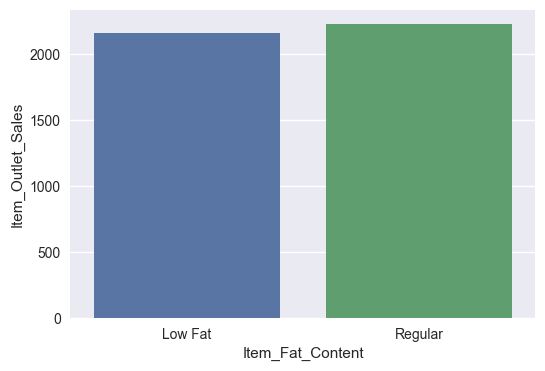

In [54]:
# plot the sales of the food with different fat content.
plt.figure(figsize = (6,4))
sns.barplot(x=fat_sale.index, y=fat_sale.values)
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content')
plt.xticks(rotation=360)

In [55]:
item_type_sale = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

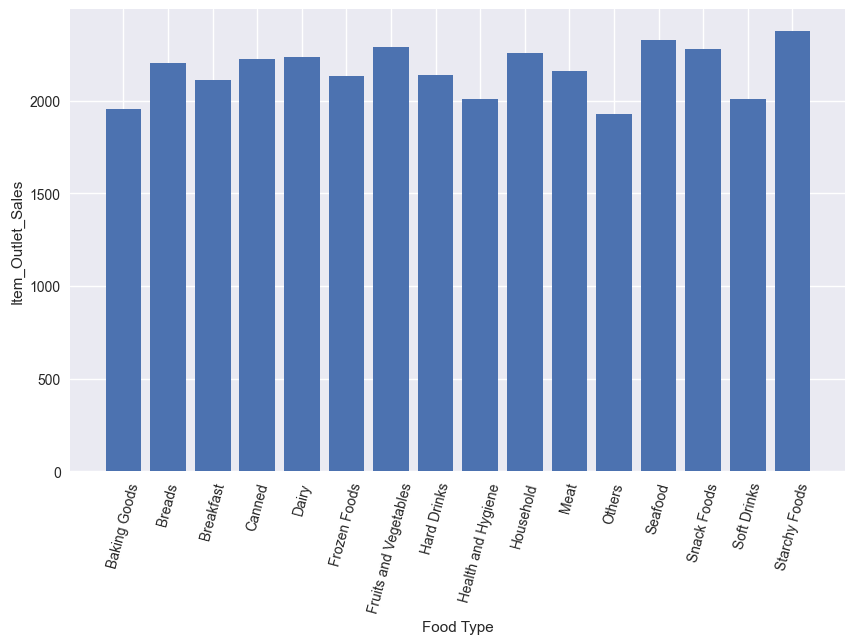

In [59]:
# plot the sales of food with different food type.
plt.figure(figsize = (10,6))
plt.bar(item_type_sale.index, item_type_sale.values)
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Food Type')
plt.xticks(rotation=75);

In [60]:
outlet_size_sale = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

In [61]:
location_type_sale = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

In [62]:
outlet_type_sale = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

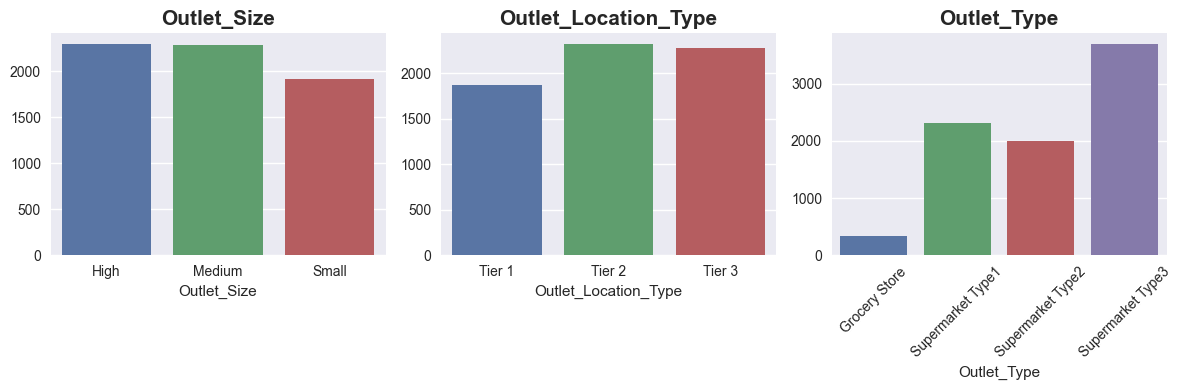

In [68]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4))

sns.barplot(outlet_size_sale.index, outlet_size_sale.values, ax=axes[0])
axes[0].set_title('Outlet_Size', fontsize = 15, fontweight = 'bold')


sns.barplot(location_type_sale.index, location_type_sale.values, ax=axes[1])
axes[1].set_title('Outlet_Location_Type', fontsize = 15, fontweight = 'bold')

sns.barplot(outlet_type_sale.index, outlet_type_sale.values, ax=axes[2])
axes[2].set_title('Outlet_Type', fontsize = 15, fontweight = 'bold')
axes[2].tick_params(axis="x", rotation=45)


fig.tight_layout()


we can see that there is no significant difference of the sales between the different outlet sizej and the different outlet location type.

But the sales gap between different outlet type can be considered as big.
  
     